In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [357]:
test_csv = pd.read_csv("/opt/ml/dataset/test/test_data.csv")
submission_csv = pd.read_csv("./prediction/14_RL_OR_TP_TPSent_512_amp.csv")
submission_my_sota_csv = pd.read_csv("./prediction/TI_submission.csv")
sota_csv = pd.read_csv("./prediction/sg_output_focal_kfold.csv")

## 1. "예측 / SOTA 값" 비교 (태일)

In [370]:
sentences = test_csv["sentence"]
subject_entities, object_entities = test_csv["subject_entity"], test_csv["object_entity"] 
# label change
my_labels = submission_csv["pred_label"]
sota_labels = sota_csv["pred_label"]

In [371]:
i = -1
cnt = 0
# while i < 50: # 전체 텍스트: len(my_labels) - 1

while i < len(my_labels)-1:
    i += 1
    if my_labels[i] == sota_labels[i]:
        continue
    cnt += 1
    print(f"{cnt}: {sentences[i]}")
    print(f"sub:{eval(subject_entities[i])['word']}, obj:{eval(object_entities[i])['word']}")
    print(f"예측: {my_labels[i]}, sota: {sota_labels[i]}")
    print()
print(f"num of diff: {cnt} / {i}")

1: 정창손은 김질과 같이 대궐로 달려가 고변하며 '신은 실로 모르고 김질만 혼자 참여하였는데, 김질의 죄는 만번 죽어 마땅합니다.'라고 하니, 세조가 특별히 김질을 사면하였다.
sub:세조, obj:정창손
예측: per:other_family, sota: no_relation

2: 소련군에서 그의 이름도 중국식의 진지첸으로 조선인으로서의 정체성도 희박했다.
sub:소련군, obj:진지첸
예측: org:alternate_names, sota: org:top_members/employees

3: 도착이 늦어져 리산드로스를 죽게 한 파우사니아스는 재판에 회부당했고, 유죄 판결이 내려지기 전에 테게아로 망명했다.
sub:리산드로스, obj:테게아
예측: no_relation, sota: per:place_of_death

4: 이에 따라 제주특별자치도청은 한국정보화진흥원을 제주로 이전하는 방안과 대구로의 이전시 현재 대구 혁신도시 이전 공공기관으로 분류된 교육과학기술연수원과 맞바꾸는 방안을 요구했으나 대구광역시청과의 협의가 원활하지 못하면서 1년 넘도록 공공기관 이전계획을 마무리짓지 못하고 있다.
sub:한국정보화진흥원, obj:대구
예측: org:place_of_headquarters, sota: no_relation

5: 일찍이 이천(利川)의 율정(栗亭) 이관의(李寬義)의 문하에서 수학하였다.
sub:이관의, obj:이천
예측: no_relation, sota: per:place_of_residence

6: 미국 축구 국가대표팀은 미국을 대표하는 축구 국가대표팀으로 멕시코와 함께 북중미 축구의 양대산맥으로 불린다.
sub:멕시코, obj:축구 국가대표팀
예측: org:members, sota: org:member_of

7: 이번에 농협에서 구매한 농업박람회 입장권은 농업인 조합원을 비롯해 농업계 고등학교 및 유치원 등에 전달되어 농업기술 교류를 통한 생산성 향상 및 미래 선진농업을 미리 체험해 볼 수 있는 계기가 될 것으로 기대된다.
sub:농협, ob

## 2. Check for Submission Distribution (찬국)
현재 자신의 모델이 잘 예측되었는지 시각적으로 확인하기 위한 코드입니다.  
해당 코드는 'no-relation으로 예측한 결과가 적으면, 그만큼 다른 label을 예측할 수 있기에 좋은 성능을 기대할 수 있을 것이다'라는 가설을 바탕으로 작성되었습니다.  
비교를 위해 리더보드에서 f1-score 70점을 달성한 재학님의 모델 예측 결과와 현재 자신의 submission의 분포를 비교할 수 있습니다.  
- 해당 코드는 distribution 확인을 위한 코드입니다. 기준 예측 결과는 추후 개선할 수 있습니다. 

In [360]:
# first_dataset
label_jh = sota_csv.groupby('pred_label').count().sort_values(by = 'id', ascending=False)
label_jh.reset_index(level=['pred_label'], inplace = True)
label_jh.drop('probs', axis=1, inplace=True)
label_jh.columns = ["pred_label", "count"]

In [353]:
# second_dataset
label = submission_csv.groupby('pred_label').count().sort_values(by = 'id', ascending=False)
label.reset_index(level=['pred_label'], inplace = True)
label.drop('probs', axis=1, inplace=True)
label.columns = ["pred_label", "count"]

In [354]:
# third_dataset
label2 = submission_my_sota_csv.groupby('pred_label').count().sort_values(by = 'id', ascending=False)
label2.reset_index(level=['pred_label'], inplace = True)
label2.drop('probs', axis=1, inplace=True)
label2.columns = ["pred_label", "count"]

## 2-1.Distribution

Text(0.5, 1.0, 'My Sota Distribution')

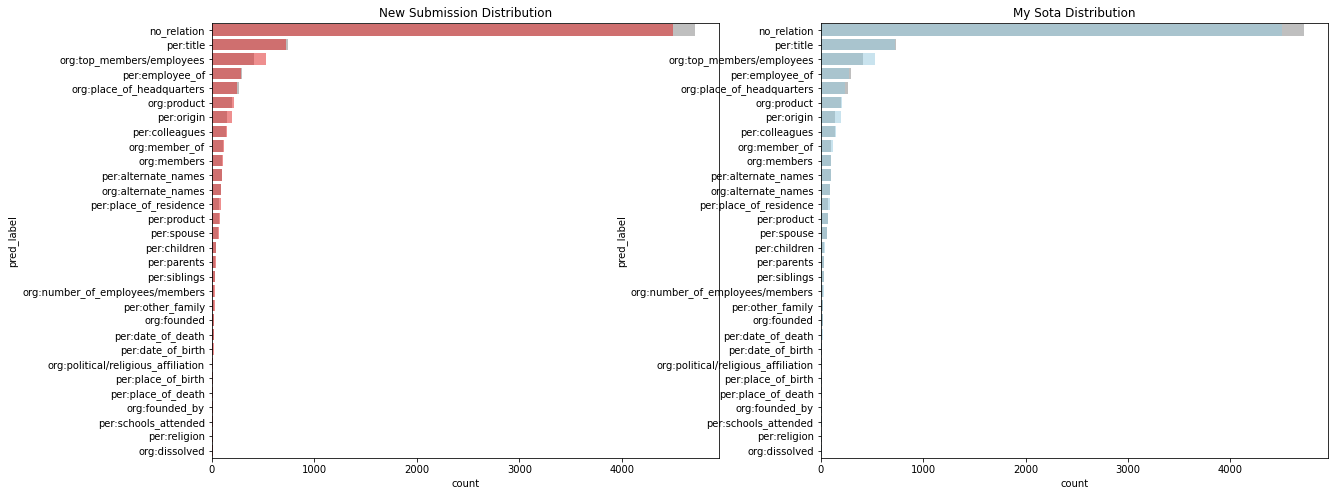

In [355]:
# 병렬적으로 확인하고 싶다면, subplot을 1,2로 주고 0ax 부분을 주석해제시키면 됩니다. 
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot(y='pred_label', x='count', data=label_jh, ax = axes[0],
              color='gray',alpha=0.5 ) # pallete:

sns.barplot(y='pred_label', x='count', data=label, ax = axes[0],
              color='red',alpha=0.5 )
axes[0].set_title("New Submission Distribution")

sns.barplot(y='pred_label', x='count', data=label_jh, ax = axes[1],
              color='gray',alpha=0.5 ) # pallete:

sns.barplot(y='pred_label', x='count', data=label2, ax = axes[1],
              color='skyblue',alpha=0.5 )
axes[0].set_title("New Submission Distribution")
axes[1].set_title("My Sota Distribution")

## 2-2.Difference

In [311]:
diff = label['count']- label_jh['count']
diff_df =pd.DataFrame({"pred_label": label_jh['pred_label'], "diff":diff})

In [312]:
diff2 = label2['count'] - label_jh['count']
diff_df2 =pd.DataFrame({"pred_label": label_jh['pred_label'], "diff":diff2})

Text(0.5, 1.0, 'My Sota Distribution')

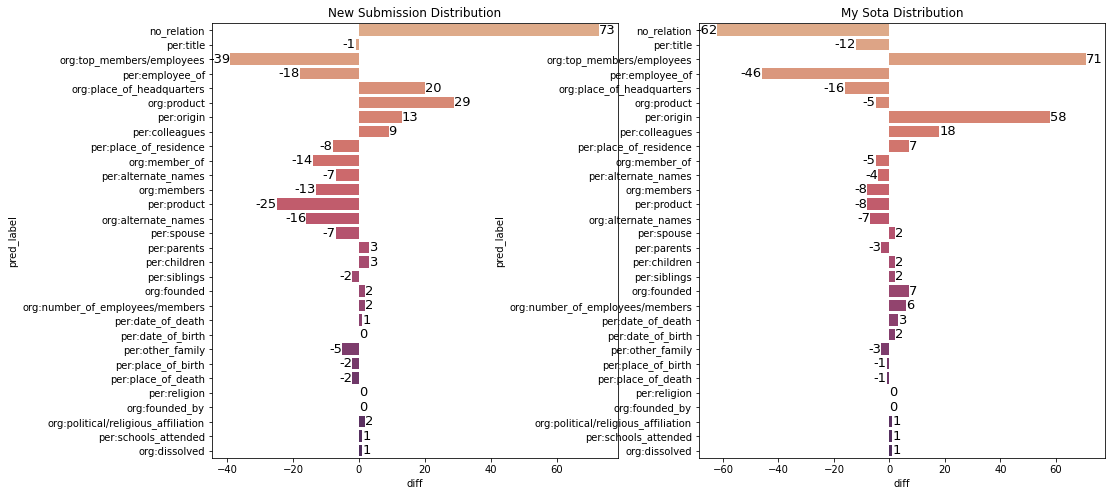

In [313]:
# 병렬적으로 확인하고 싶다면, subplot을 1,2로 주고 0ax 부분을 주석해제시키면 됩니다. 
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
sns.barplot(y='pred_label', x='diff', data=diff_df, ax = axes[0],
              palette='flare')
sns.barplot(y='pred_label', x='diff', data=diff_df2, ax = axes[1],
              palette='flare')
for i, j in zip(axes[0].containers, axes[1].containers):
    axes[0].bar_label(i, fontsize=13)
    axes[1].bar_label(j, fontsize=13)
axes[0].set_title("New Submission Distribution")
axes[1].set_title("My Sota Distribution")

## csv파일로 뽑기(나연 추가)

In [256]:
from load_data import *
from train import *

test_csv = pd.read_csv("/opt/ml/dataset/test/test_data.csv")
test_csv = preprocessing_dataset(test_csv, marking_mode='normal')

res_df = pd.DataFrame()
res_df['sentence'] = test_csv['sentence']
res_df['sub'] = test_csv["subject_entity"]
res_df['obj'] = test_csv["object_entity"] 

res_df['sota'] = sota_csv["pred_label"]
res_df['my'] = submission_csv["pred_label"]

diff_df = res_df[res_df['sota'] != res_df['my']]  # sota와 다른 부분만
diff_df.to_csv("sub_eda.csv", index=False, encoding="utf-8-sig")  # 저장
diff_df
# res_df

TypeError: preprocessing_dataset() missing 1 required positional argument: 'filter'